# Laboratorio: Análisis de Regresión

### Antes de empezar:

* Lee el archivo README.md
* Comenta tanto como puedas y utiliza los recursos (archivo README.md)

¡Feliz aprendizaje!

## Desafío 1
Trabajo en un bootcamp de programación, y he desarrollado una teoría de que cuanto más jóvenes son mis estudiantes, más a menudo llegan tarde a clase. Para probar mi hipótesis, he recopilado algunos datos en la siguiente tabla:

| StudentID | Edad | Retrasos |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Utiliza este comando para crear un dataframe con los datos proporcionados en la tabla.
~~~~
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [9]:
# Your code here. 
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})

student_data.head(10)

,Edad,Retrasos
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Dibuja un diagrama de dispersión (scatter plot) para los datos.

<Axes: xlabel='Edad', ylabel='Retrasos'>

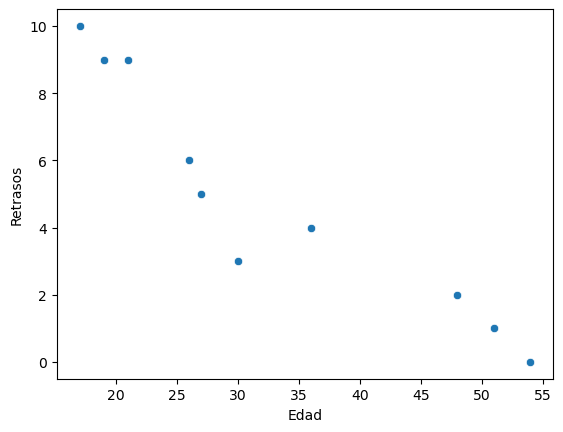

In [24]:
# Your code here
diagrama = sns.scatterplot(x="Edad", y="Retrasos", data=student_data);
diagrama

¿Ves alguna tendencia? ¿Puedes hacer alguna hipótesis sobre la relación entre la edad y el número de retrasos?

*tu explicación aquí*

Calcula la covarianza y la correlación de las variables en tu gráfico. ¿Cuál es la diferencia entre estas dos medidas? Compara sus valores. ¿Qué te indican en este caso? Agrega tus respuestas como comentarios después de tu código.

In [30]:
# your code here
student_data.describe()

,Edad,Retrasos
count,10.000000,10.000000
mean,32.900000,4.900000
std,13.698743,3.541814
min,17.000000,0.000000
25%,22.250000,2.250000
50%,28.500000,4.500000
75%,45.000000,8.250000
max,54.000000,10.000000


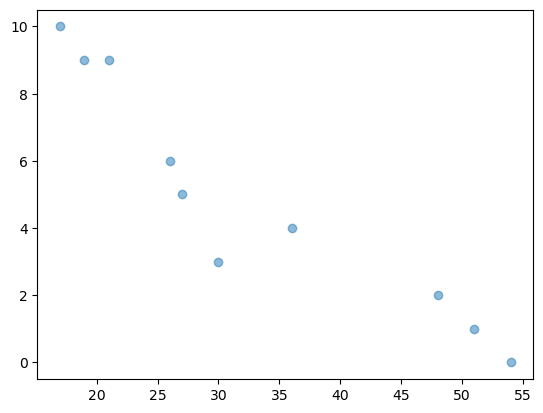

In [37]:
X = student_data.Edad.values.reshape(-1, 1)
y = student_data.Retrasos.values

plt.plot(X, y, "o", alpha=.5)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8, 1) (2, 1) (8,) (2,)


In [43]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

# Print coefs
print(lm.intercept_, lm.coef_)

X_train[:10]

y_train[:10]


lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

# Print coeficient and intercept of the regression
print(lm.intercept_, lm.coef_)

12.746942800788958 [-0.24418146]
12.746942800788958 [-0.24418146]


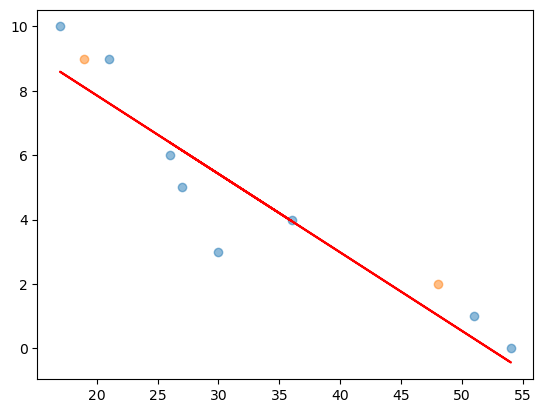

In [46]:
y_train_pred = lm.predict(X_train)

plt.plot(X_train, y_train, "o", alpha=.5)
plt.plot(X_test, y_test, "o", alpha=.5)
plt.plot(X_train, y_train_pred, "r")

Construye un modelo de regresión para estos datos. ¿Cuál será tu variable de resultado? ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [ ]:
# your explanation here

Grafica tu modelo de regresión en tu diagrama de dispersión.

In [1]:
# Your code here.

Interpreta los resultados de tu modelo. ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? ¿Podemos decir que la edad es un buen predictor de la tardanza? Agrega tus respuestas como comentarios después de tu código.

*tu explicación aquí*

## Desafío 2
Para la segunda parte de este laboratorio, utilizaremos el conjunto de datos vehicles.csv. Puedes encontrar una copia del conjunto de datos en la carpeta de GitHub. Este conjunto de datos incluye variables relacionadas con las características de los vehículos, incluyendo el modelo, la marca y los estándares de eficiencia energética, así como las emisiones de CO2 de cada coche. Como se discutió en clase, el objetivo de este ejercicio es predecir las emisiones de CO2 de los vehículos basándose en varias variables independientes.

In [49]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("vehicles.csv")

In [73]:
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [53]:
vehicles.describe()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
count,35952.00000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000
mean,2000.71640,3.338493,5.765076,17.609056,17.646139,23.880646,19.929322,475.316339,1892.598465
std,10.08529,1.359395,1.755268,4.467283,4.769349,5.890876,5.112409,119.060773,506.958627
min,1984.00000,0.600000,2.000000,0.060000,6.000000,9.000000,7.000000,37.000000,600.000000
25%,1991.00000,2.200000,4.000000,14.699423,15.000000,20.000000,16.000000,395.000000,1500.000000
50%,2001.00000,3.000000,6.000000,17.347895,17.000000,24.000000,19.000000,467.736842,1850.000000
75%,2010.00000,4.300000,6.000000,20.600625,20.000000,27.000000,23.000000,555.437500,2200.000000
max,2017.00000,8.400000,16.000000,47.087143,58.000000,61.000000,56.000000,1269.571429,5800.000000


In [76]:
X_train_vehicles = pd.DataFrame(X_train, columns=vehicles.keys)
X_test_vehicles = pd.DataFrame(X_test, columns=vehicles.keys)
X_train_df

TypeError: Index(...) must be called with a collection of some kind, <bound method NDFrame.keys of                    Make                Model  Year  Engine Displacement  \
0            AM General    DJ Po Vehicle 2WD  1984                  2.5   
1            AM General     FJ8c Post Office  1984                  4.2   
2            AM General  Post Office DJ5 2WD  1985                  2.5   
3            AM General  Post Office DJ8 2WD  1985                  4.2   
4      ASC Incorporated                  GNX  1987                  3.8   
...                 ...                  ...   ...                  ...   
35947             smart         fortwo coupe  2013                  1.0   
35948             smart         fortwo coupe  2014                  1.0   
35949             smart         fortwo coupe  2015                  1.0   
35950             smart         fortwo coupe  2016                  0.9   
35951             smart         fortwo coupe  2016                  0.9   

       Cylinders     Transmission        Drivetrain  \
0            4.0  Automatic 3-spd     2-Wheel Drive   
1            6.0  Automatic 3-spd     2-Wheel Drive   
2            4.0  Automatic 3-spd  Rear-Wheel Drive   
3            6.0  Automatic 3-spd  Rear-Wheel Drive   
4            6.0  Automatic 4-spd  Rear-Wheel Drive   
...          ...              ...               ...   
35947        3.0        Auto(AM5)  Rear-Wheel Drive   
35948        3.0        Auto(AM5)  Rear-Wheel Drive   
35949        3.0        Auto(AM5)  Rear-Wheel Drive   
35950        3.0        Auto(AM6)  Rear-Wheel Drive   
35951        3.0     Manual 5-spd  Rear-Wheel Drive   

                     Vehicle Class Fuel Type  Fuel Barrels/Year  City MPG  \
0      Special Purpose Vehicle 2WD   Regular          19.388824        18   
1      Special Purpose Vehicle 2WD   Regular          25.354615        13   
2      Special Purpose Vehicle 2WD   Regular          20.600625        16   
3      Special Purpose Vehicle 2WD   Regular          25.354615        13   
4                     Midsize Cars   Premium          20.600625        14   
...                            ...       ...                ...       ...   
35947                  Two Seaters   Premium           9.155833        34   
35948                  Two Seaters   Premium           9.155833        34   
35949                  Two Seaters   Premium           9.155833        34   
35950                  Two Seaters   Premium           9.155833        34   
35951                  Two Seaters   Premium           9.417429        32   

       Highway MPG  Combined MPG  CO2 Emission Grams/Mile  Fuel Cost/Year  
0               17            17               522.764706            1950  
1               13            13               683.615385            2550  
2               17            16               555.437500            2100  
3               13            13               683.615385            2550  
4               21            16               555.437500            2550  
...            ...           ...                      ...             ...  
35947           38            36               244.000000            1100  
35948           38            36               243.000000            1100  
35949           38            36               244.000000            1100  
35950           39            36               246.000000            1100  
35951           39            35               255.000000            1150  

[35952 rows x 15 columns]> was passed

In [69]:
print('keys: {}'.format(vehicles.keys()))
print('feature names: {}'.format(vehicles.feature_names))
#print(boston.DESCR)

keys: Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')


AttributeError: 'DataFrame' object has no attribute 'feature_names'

Vamos a utilizar las siguientes variables para nuestro análisis: Año, Cilindros, Barriles de Combustible/Año, MPG Combinado, y Costo de Combustible/Año. Utilizaremos 'Emisiones de CO2 Gramos/Milla' como nuestra variable de resultado.

Calcula las correlaciones entre cada una de estas variables y el resultado. ¿Cuál variable crees que será la más importante para determinar las emisiones de CO2? ¿Cuál proporciona la menor cantidad de información útil para determinar las emisiones de CO2? Agrega tus respuestas como comentarios después de tu código.

In [ ]:
# Your code here.

Construye un modelo de regresión para estos datos. ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [ ]:
# Your code here.

Imprime el resumen de tu regresión e interpreta los resultados. ¿Cuáles son las variables más importantes en tu modelo y por qué? ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? Agrega tus respuestas como comentarios después de tu código.

In [ ]:
# Your code here.

## Desafío Extra: Análisis de Errores

Estoy sospechando de las últimas fiestas que he organizado: parece que cuanto más gente invito, más personas no pueden asistir. Para saber si mi presentimiento está respaldado por los datos, he decidido hacer un análisis. He recopilado mis datos en la tabla a continuación, donde X es el número de personas que invité, y Y es el número de personas que asistieron.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

Queremos saber si la relación modelada por las dos variables aleatorias es lineal o no, y por lo tanto, si es apropiado modelarla con una regresión lineal.
Primero, construye un dataframe con los datos.

In [89]:
# Your code here.
fiestas = {
    'x': [1,3,4,6,8,9,11,14],
    'y': [1, 2,4,4,5,7,8,13],
    
}

fiesta = pd.DataFrame(fiestas)
print(fiesta)

    x   y
0   1   1
1   3   2
2   4   4
3   6   4
4   8   5
5   9   7
6  11   8
7  14  13


In [91]:
fiesta.describe()

,x,y
count,8.000000,8.000000
mean,7.000000,5.500000
std,4.342481,3.817254
min,1.000000,1.000000
25%,3.750000,3.500000
50%,7.000000,4.500000
75%,9.500000,7.250000
max,14.000000,13.000000


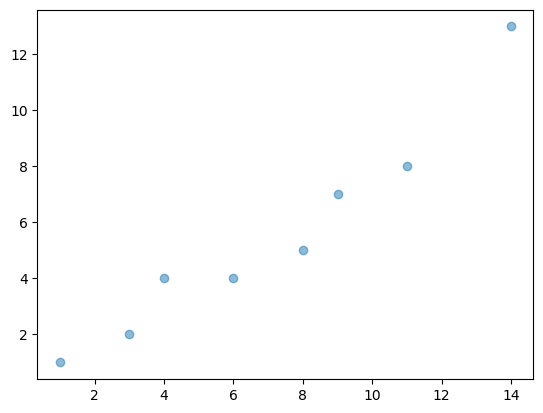

In [93]:
X = fiesta.x.values.reshape(-1, 1)
y = fiesta.y.values

plt.plot(X, y, "o", alpha=.5)

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6, 1) (2, 1) (6,) (2,)


In [97]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

# Print coefs
print(lm.intercept_, lm.coef_)

X_train[:10]

y_train[:10]


lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

# Print coeficient and intercept of the regression
print(lm.intercept_, lm.coef_)

0.5165394402035615 [0.66412214]
0.5165394402035615 [0.66412214]


Dibuja un diagrama de dispersión (scatter plot) para los datos y ajusta una línea de regresión.

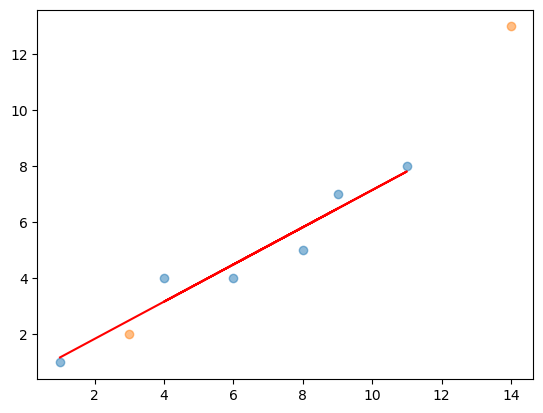

In [99]:
# Your code here.
y_train_pred = lm.predict(X_train)

plt.plot(X_train, y_train, "o", alpha=.5)
plt.plot(X_test, y_test, "o", alpha=.5)
plt.plot(X_train, y_train_pred, "r")


¿Qué ves? ¿Qué te indica este gráfico sobre la probable relación entre las variables? Imprime los resultados de tu regresión.

*tu explicación aquí*

¿Ves algún punto problemático o valores atípicos en tus datos? Elimina estos puntos y recalcula tu regresión. Imprime el nuevo diagrama de dispersión con tu nuevo modelo y los resultados de tu modelo.

In [2]:
# Your response here.

¿Qué cambió? Basado en los resultados de los dos modelos y tus gráficos, ¿qué puedes decir sobre la forma de los datos con el punto problemático y sin él?

*tu explicación aquí*